In [1]:
# import libraries for data analysis
%matplotlib inline
import pandas as pd
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
matplotlib.rcParams['figure.figsize'] = (14, 6)

In [4]:
# import the data
data = pd.read_csv("data/SlowPush_Aug4_Comparison.CSV")
sensor_distance = 0.195 # TODO: set to the proper distance (in m)

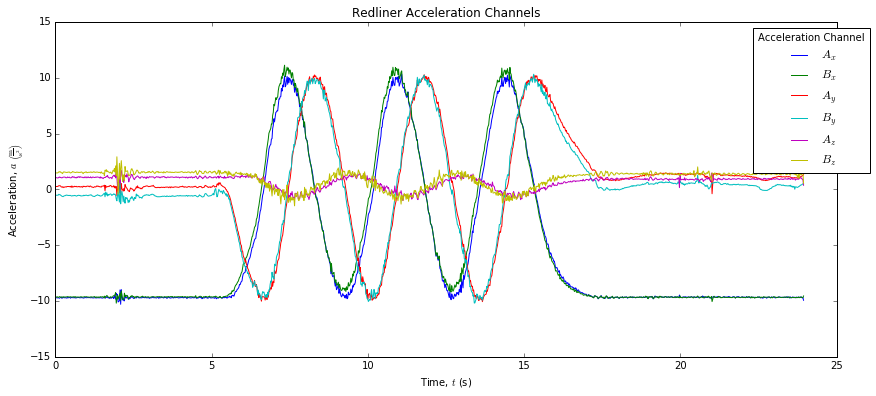

In [3]:
# plot everything
# two subplots sharing both x/y axes
plt.plot(data['Timestamp'], data['A_x'], label='$A_x$')
plt.plot(data['Timestamp'], data['B_x'], label='$B_x$')
plt.plot(data['Timestamp'], data['A_y'], label='$A_y$')
plt.plot(data['Timestamp'], data['B_y'], label='$B_y$')
plt.plot(data['Timestamp'], data['A_z'], label='$A_z$')
plt.plot(data['Timestamp'], data['B_z'], label='$B_z$')
plt.title('Redliner Acceleration Channels')
plt.ylabel('Acceleration, $a$ $\\left(\\frac{\\mathrm{m}}{\\mathrm{s}^2}\\right)$')
plt.xlabel('Time, $t$ (s)')
plt.legend(bbox_to_anchor=(1.05, 1), title='Acceleration Channel')

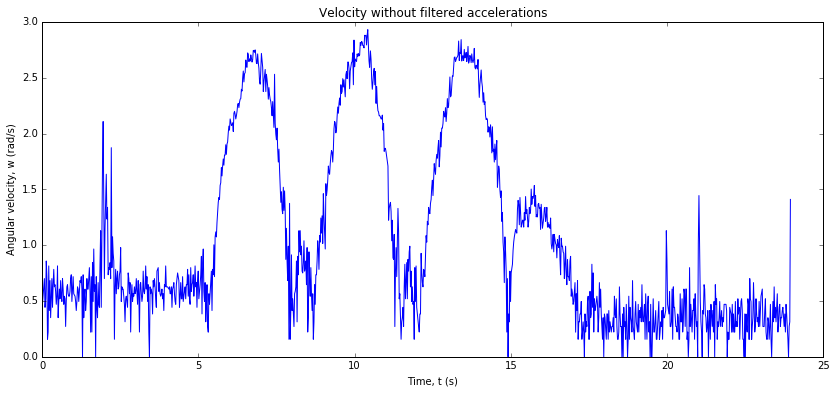

In [17]:
# calculate the velocity (without filtering)
dx = np.subtract(data['B_x'], data['A_x'])
angular_velocity = np.sqrt(np.abs(dx) / sensor_distance)
plt.plot(data['Timestamp'], angular_velocity)
plt.xlabel('Time, t (s)')
plt.ylabel('Angular velocity, w (rad/s)')
plt.title('Velocity without filtered accelerations')

In [13]:
# a running mean function
def runningMeanFast(x, N):
    return np.convolve(x, np.ones((N,))/N)[(N-1):]

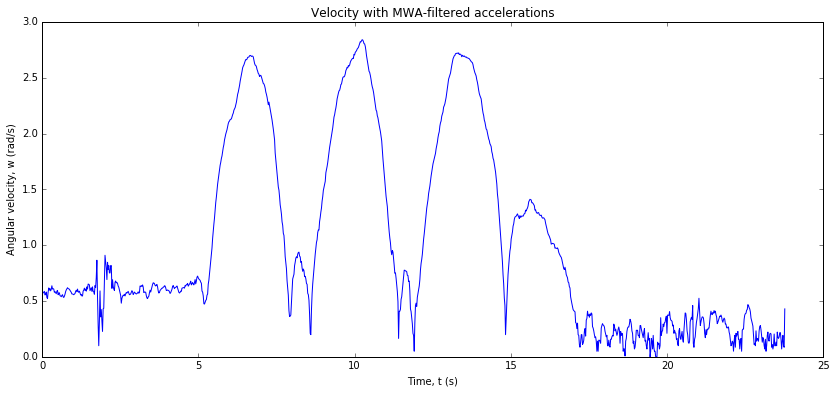

In [23]:
# calculate the velocity (with filtering)
dx = np.subtract(runningMeanFast(data['B_x'], 10), runningMeanFast(data['A_x'], 10))
angular_velocity = np.sqrt(np.abs(dx) / sensor_distance)
plt.plot(data['Timestamp'], angular_velocity)
plt.xlabel('Time, t (s)')
plt.ylabel('Angular velocity, w (rad/s)')
plt.title('Velocity with MWA-filtered accelerations')

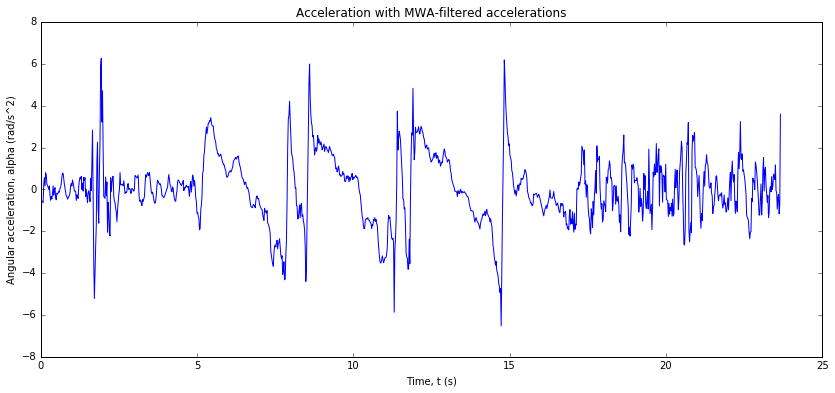

In [25]:
# calculate the acceleration
dt = np.subtract(data['Timestamp'][1:-1], data['Timestamp'][0:-2])
dv = np.subtract(angular_velocity[1:-1], angular_velocity[0:-2])
angular_acceleration = np.divide(dv, dt)
angular_acceleration = runningMeanFast(angular_acceleration, 5)
plt.plot(data['Timestamp'][:-2], angular_acceleration);
plt.xlabel('Time, t (s)')
plt.ylabel('Angular acceleration, alpha (rad/s^2)')
plt.title('Acceleration with MWA-filtered accelerations')